In [1]:
!apt install -y caffe-cpu

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  caffe-tools-cpu cython3 fonts-lyx javascript-common libblosc1 libcaffe-cpu1
  libgflags2.2 libgoogle-glog0v5 libjs-jquery-ui libleveldb1v5 liblmdb0
  python-matplotlib-data python-tables-data python3-bs4 python3-caffe-cpu
  python3-chardet python3-cycler python3-dateutil python3-decorator
  python3-gflags python3-h5py python3-html5lib python3-ipython
  python3-ipython-genutils python3-leveldb python3-lxml python3-matplotlib
  python3-networkx python3-nose python3-numexpr python3-olefile python3-pandas
  python3-pandas-lib python3-pexpect python3-pickleshare python3-pil
  python3-pkg-resources python3-prompt-toolkit python3-protobuf
  python3-ptyprocess python3-pygments python3-pyparsing python3-pywt
  pyt

In [2]:
from urllib.request import urlretrieve
import os
from zipfile import ZipFile

def download(url, file):
    if not os.path.isfile(file):
        print("Download file... " + file + " ...")
        urlretrieve(url,file)
        print("File downloaded")

download('https://dataverse.harvard.edu/api/access/datafile/:persistentId?persistentId=doi:10.7910/DVN/EBLENC/PNXEDO','dyspan_files.tar.gz')
print("All the files are downloaded")

Download file... dyspan_files.tar.gz ...
File downloaded
All the files are downloaded


In [3]:
!ls -la

total 324520
drwxr-xr-x 1 root root      4096 Feb  5 03:06 .
drwxr-xr-x 1 root root      4096 Feb  5 03:04 ..
drwxr-xr-x 1 root root      4096 Jan 31 17:11 .config
-rw-r--r-- 1 root root 332289068 Feb  5 03:07 dyspan_files.tar.gz
drwxr-xr-x 1 root root      4096 Jan 30 17:25 sample_data


In [0]:
import tarfile
tar = tarfile.open('dyspan_files.tar.gz', "r:gz")
tar.extractall()
tar.close()

In [5]:
!ls -la

total 324528
drwxr-xr-x 1 root root      4096 Feb  5 03:07 .
drwxr-xr-x 1 root root      4096 Feb  5 03:04 ..
drwxr-xr-x 1 root root      4096 Jan 31 17:11 .config
drwxrwxr-x 2 1000 1000      4096 Aug  2  2017 dyspan_files
-rw-r--r-- 1 root root 332289068 Feb  5 03:07 dyspan_files.tar.gz
drwxr-xr-x 1 root root      4096 Jan 30 17:25 sample_data


In [6]:
!ls -la dyspan_files

total 339460
drwxrwxr-x 2 1000 1000      4096 Aug  2  2017  .
drwxr-xr-x 1 root root      4096 Feb  5 03:07  ..
-rw-r--r-- 1 1000 1000      4679 Jul 17  2017  deploy.prototxt
-rw-r--r-- 1 1000 1000  19811494 Jul 14  2017  Model.caffemodel
-rw-rw-r-- 1 1000 1000       432 Aug  2  2017  README
-rw-r--r-- 1 1000 1000       347 Jul 31  2017  solver.prototxt
-rw-r--r-- 1 1000 1000 327760207 Jul 14  2017 'TCCN dataset.rar'
-rw-r--r-- 1 1000 1000      5486 Jul 31  2017  train_val.prototxt


!git clone https://github.com/ethereon/caffe-tensorflow.git

!caffe-tensorflow/convert.py dyspan_files/deploy.prototxt --caffemodel dyspan_files/Model.caffemodel --data-output-path=mynet.npy

In [7]:
pip install patool

     |████████████████████████████████| 81kB 2.3MB/s 


In [8]:
import patoolib
patoolib.extract_archive("dyspan_files/TCCN dataset.rar", outdir="dyspan_files/")

patool: Extracting dyspan_files/TCCN dataset.rar ...
patool: running /usr/bin/unrar x -- "/content/dyspan_files/TCCN dataset.rar"
patool:     with cwd='dyspan_files/'
patool: ... dyspan_files/TCCN dataset.rar extracted to `dyspan_files/'.


'dyspan_files/'

In [9]:
!ls -la dyspan_files/

total 339468
drwxrwxr-x 3 1000 1000      4096 Feb  5 03:07  .
drwxr-xr-x 1 root root      4096 Feb  5 03:07  ..
-rw-r--r-- 1 1000 1000      4679 Jul 17  2017  deploy.prototxt
-rw-r--r-- 1 1000 1000  19811494 Jul 14  2017  Model.caffemodel
-rw-rw-r-- 1 1000 1000       432 Aug  2  2017  README
-rw-r--r-- 1 1000 1000       347 Jul 31  2017  solver.prototxt
drwxr-xr-x 4 root root      4096 Jul 14  2017 'TCCN dataset'
-rw-r--r-- 1 1000 1000 327760207 Jul 14  2017 'TCCN dataset.rar'
-rw-r--r-- 1 1000 1000      5486 Jul 31  2017  train_val.prototxt


In [0]:
mv dyspan_files/TCCN\ dataset dyspan_files/TCCN_dataset

In [0]:
def change_name(dst):
  for dir_old in os.listdir(dst):
    dir_new=dir_old.split('_')[0]
    os.rename(dst+'/'+dir_old,dst+'/'+dir_new)

In [0]:
change_name('dyspan_files/TCCN_dataset/testing')
change_name('dyspan_files/TCCN_dataset/training')

In [13]:
!ls -la dyspan_files/TCCN_dataset/testing

total 936
drwxr-xr-x 12 root root   4096 Feb  5 03:07 .
drwxr-xr-x  4 root root   4096 Jul 14  2017 ..
drwxr-xr-x  2 root root 118784 Jul 14  2017 class0
drwxr-xr-x  2 root root  98304 Jul 14  2017 class1
drwxr-xr-x  2 root root 258048 Jul 14  2017 class2
drwxr-xr-x  2 root root  40960 Jul 14  2017 class3
drwxr-xr-x  2 root root 245760 Jul 14  2017 class4
drwxr-xr-x  2 root root  36864 Jul 14  2017 class5
drwxr-xr-x  2 root root  36864 Jul 14  2017 class6
drwxr-xr-x  2 root root  36864 Jul 14  2017 class7
drwxr-xr-x  2 root root  36864 Jul 14  2017 class8
drwxr-xr-x  2 root root  36864 Jul 14  2017 class9


from google.colab import files

uploaded = files.upload()

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import caffe

In [0]:
caffe.set_mode_cpu()

In [0]:
net = caffe.Net('dyspan_files/deploy.prototxt', 'dyspan_files/Model.caffemodel', caffe.TEST)

In [17]:
print(net.inputs)

['data']


In [18]:
print(net.blobs)

OrderedDict([('data', <caffe._caffe.Blob object at 0x7f70da3a1978>), ('conv1', <caffe._caffe.Blob object at 0x7f70b13cac90>), ('pool1', <caffe._caffe.Blob object at 0x7f70b13caea0>), ('norm1', <caffe._caffe.Blob object at 0x7f70b13cadf0>), ('conv2', <caffe._caffe.Blob object at 0x7f70b13cad98>), ('pool2', <caffe._caffe.Blob object at 0x7f70b13cad40>), ('norm2', <caffe._caffe.Blob object at 0x7f70b13cace8>), ('conv3', <caffe._caffe.Blob object at 0x7f70b13ca7c0>), ('conv4', <caffe._caffe.Blob object at 0x7f70b13cac38>), ('conv5', <caffe._caffe.Blob object at 0x7f70b13cafa8>), ('pool5', <caffe._caffe.Blob object at 0x7f70b13cabe0>), ('fc6', <caffe._caffe.Blob object at 0x7f70b13cae48>), ('fc7', <caffe._caffe.Blob object at 0x7f70b13caf50>), ('fc8_dyspan', <caffe._caffe.Blob object at 0x7f70b13e2030>), ('prob', <caffe._caffe.Blob object at 0x7f70b13e2088>)])


In [0]:
W1=net.params['conv1'][0].data
b1=net.params['conv1'][1].data
W2=net.params['conv2'][0].data
b2=net.params['conv2'][1].data
W3=net.params['conv3'][0].data
b3=net.params['conv3'][1].data
W4=net.params['conv4'][0].data
b4=net.params['conv4'][1].data
W5=net.params['conv5'][0].data
b5=net.params['conv5'][1].data
W6=net.params['fc6'][0].data
b6=net.params['fc6'][1].data
W7=net.params['fc7'][0].data
b7=net.params['fc7'][1].data
W8=net.params['fc8_dyspan'][0].data
b8=net.params['fc8_dyspan'][1].data

In [20]:
print('W1 is ',W1.shape)
print('b1 is ',b1.shape)
print('W2 is ',W2.shape)
print('b2 is ',b2.shape)
print('W3 is ',W3.shape)
print('b3 is ',b3.shape)
print('W4 is ',W4.shape)
print('b4 is ',b4.shape)
print('W5 is ',W5.shape)
print('b5 is ',b5.shape)
print('W6 is ',W6.shape)
print('b6 is ',b6.shape)
print('W7 is ',W7.shape)
print('b7 is ',b7.shape)
print('W8 is ',W8.shape)
print('b8 is ',b8.shape)

W1 is  (48, 1, 11, 11)
b1 is  (48,)
W2 is  (128, 24, 5, 5)
b2 is  (128,)
W3 is  (192, 128, 3, 3)
b3 is  (192,)
W4 is  (192, 96, 3, 3)
b4 is  (192,)
W5 is  (128, 96, 3, 3)
b5 is  (128,)
W6 is  (1024, 128)
b6 is  (1024,)
W7 is  (4096, 1024)
b7 is  (4096,)
W8 is  (10, 4096)
b8 is  (10,)


np.savez('Parameters', W1, b1, W2, b2, W3, b3, W4, b4, W5, b5, W6, b6, W7, b7, W8, b8)

f1=np.load('Parameters.npz')

from google.colab import files
files.download('Parameters.npz') 

In [21]:
!ls

dyspan_files  dyspan_files.tar.gz  sample_data


In [22]:
for li in range(len(net.layers)):  # for each layer in the net
  print ("{}\t{}\t".format(li, net._layer_names[li])),      
  # for each input to the layer (aka "bottom") print its name and shape
  for bi in list(net._bottom_ids(li)):
    print ("{} ({}) ".format(net._blob_names[bi], net.blobs[net._blob_names[bi]].data.shape)),
  print ("\t")
  # for each output of the layer (aka "top") print its name and shape
  for bi in list(net._top_ids(li)):
    print ("{} ({}) ".format(net._blob_names[bi], net.blobs[net._blob_names[bi]].data.shape)) 
  print ("")  # end of line

0	data	
	
data ((1, 1, 64, 64)) 

1	conv1	
data ((1, 1, 64, 64)) 
	
conv1 ((1, 48, 14, 14)) 

2	relu1	
conv1 ((1, 48, 14, 14)) 
	
conv1 ((1, 48, 14, 14)) 

3	pool1	
conv1 ((1, 48, 14, 14)) 
	
pool1 ((1, 48, 7, 7)) 

4	norm1	
pool1 ((1, 48, 7, 7)) 
	
norm1 ((1, 48, 7, 7)) 

5	conv2	
norm1 ((1, 48, 7, 7)) 
	
conv2 ((1, 128, 7, 7)) 

6	relu2	
conv2 ((1, 128, 7, 7)) 
	
conv2 ((1, 128, 7, 7)) 

7	pool2	
conv2 ((1, 128, 7, 7)) 
	
pool2 ((1, 128, 3, 3)) 

8	norm2	
pool2 ((1, 128, 3, 3)) 
	
norm2 ((1, 128, 3, 3)) 

9	conv3	
norm2 ((1, 128, 3, 3)) 
	
conv3 ((1, 192, 3, 3)) 

10	relu3	
conv3 ((1, 192, 3, 3)) 
	
conv3 ((1, 192, 3, 3)) 

11	conv4	
conv3 ((1, 192, 3, 3)) 
	
conv4 ((1, 192, 3, 3)) 

12	relu4	
conv4 ((1, 192, 3, 3)) 
	
conv4 ((1, 192, 3, 3)) 

13	conv5	
conv4 ((1, 192, 3, 3)) 
	
conv5 ((1, 128, 3, 3)) 

14	relu5	
conv5 ((1, 128, 3, 3)) 
	
conv5 ((1, 128, 3, 3)) 

15	pool5	
conv5 ((1, 128, 3, 3)) 
	
pool5 ((1, 128, 1, 1)) 

16	fc6	
pool5 ((1, 128, 1, 1)) 
	
fc6 ((1, 1024)) 

17	relu6	

caffe.draw.draw_net_to_file(net, 'net.png', 'LR')

In [0]:
#image = caffe.io.load_image("dyspan_files/TCCN_dataset/testing/class0/scenario_0_c0_n2_1223.jpg")

In [55]:
im = Image.open("dyspan_files/TCCN_dataset/testing/class4/scenario_4_c01_n2_13.jpg")
np_im = np.array(im)
np_im.shape

(64, 64)

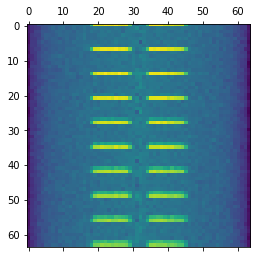

In [56]:
from matplotlib import pyplot as plt
%matplotlib inline 
plt.matshow(np_im)

In [0]:
transformer = caffe.io.Transformer({'data': net.blobs['data'].data.shape})

In [0]:
net.blobs['data'].reshape(1,1,64,64)
net.blobs['data'].data[...] = np.reshape(np_im,(1,1,64,64))

In [59]:
out = net.forward()
print(out['prob'].argmax())

0
